 #                                         VERZEO INTERNSHIP
                                           Major project - july (Batch - 2)

# Project Name :
              Data Science with Python - Machine learning july major

# Project Description :
              The dataset is of 0-9 digits converted from image to input features, every row represents a specific digit image along with labels for every row. You can view the image using Matplotlib if you wish to. Design a project from the MNIST dataset to identify digit classification using any of the classification algorithms.


# Dataset :
            digit_svm.csv

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 12, 4

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data loading and exploring

In [4]:
df = pd.read_csv("digit_svm.csv")

In [5]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

In [8]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [13]:
def pixel_mat(row):
    vec = df.drop('label', axis=1).iloc[row].values
    pixel_mat = vec.reshape(28, 28)
    return pixel_mat

In [14]:
x = np.random.randint(0, 42000)
X = pixel_mat(x)
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
X = X[~np.all(X==0, axis=1)]
X = X[:, ~np.all(X==0, axis=0)]
X

array([[ 10, 178, 254, 219, 254, 254, 255, 219, 184, 161, 112,  67,  67,
         67,  37,   0,   0,   0],
       [123, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 241, 159,  19,   0],
       [132, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
        254, 254, 254, 141,   0],
       [ 93, 209, 254, 183, 178, 112, 175, 178, 178, 179, 245, 254, 254,
        254, 254, 254, 235,  25],
       [  0,   8,  18,   2,   0,   0,   0,   0,   0,   0,  17,  18,  82,
        226, 254, 254, 254,  37],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 254, 254, 249,  35],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        236, 254, 254, 197,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  74,
        253, 254, 254, 107,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156,
        254, 254, 254,  23,   0],
       [  0,   0,   0,   0,   0,   0,

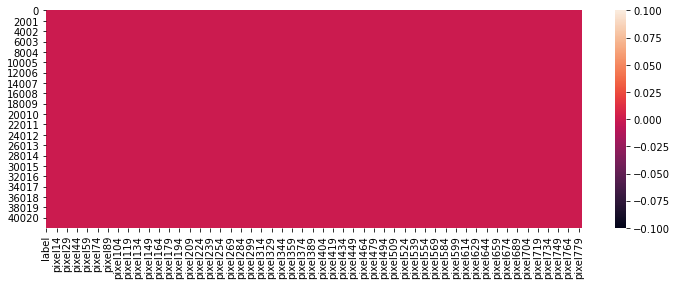

In [16]:
sn.heatmap(df.isnull())
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

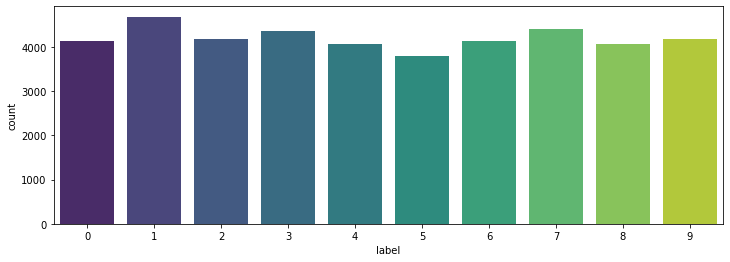

In [17]:
sn.countplot(df['label'], palette = 'viridis')

<AxesSubplot:>

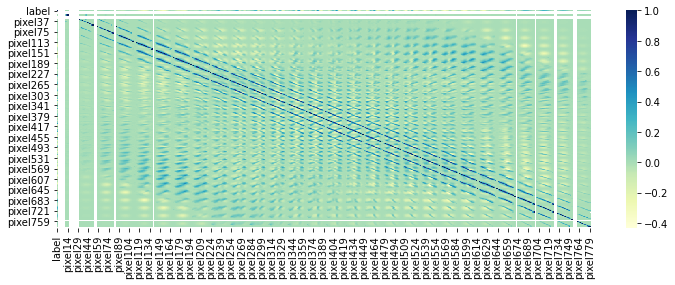

In [18]:
plt.figure
sn.heatmap(data=df.corr(), annot=False, cmap='YlGnBu')

In [19]:
df['label'].value_counts().sort_values(ascending=False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

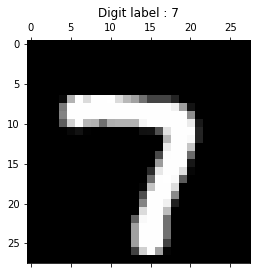

In [20]:
plt.matshow(pixel_mat(x), cmap = plt.cm.gray)
plt.title('Digit label : %d' % df['label'].iloc[x])
plt.show()

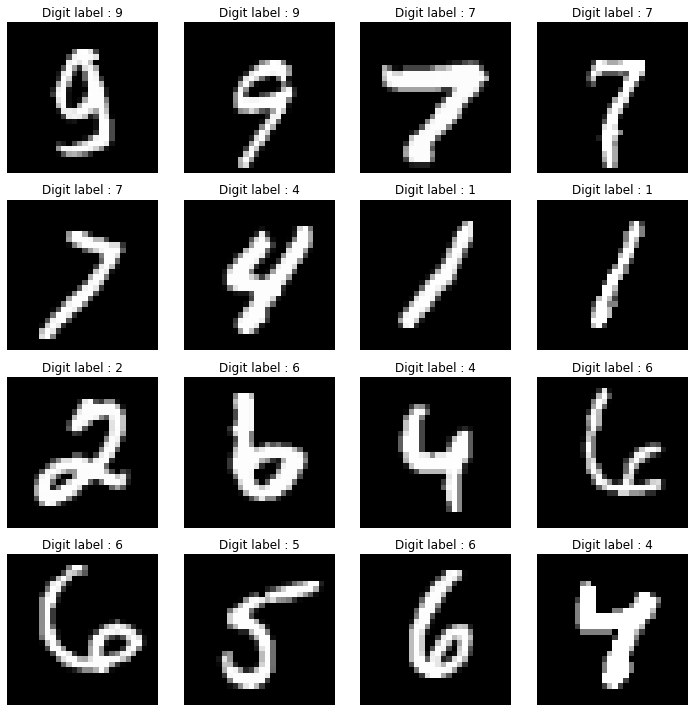

In [21]:
rand_idx = np.random.choice(df.index, size = 16, replace=False)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

i=0
for ax in axs.reshape(-1):
    ax.set_title("Digit label : %d" % df['label'].iloc[rand_idx[i]])
    ax.imshow(pixel_mat(rand_idx[i]), cmap = plt.cm.gray, origin = 'upper', interpolation='nearest')
    ax.axis('off')
    i+=1
plt.tight_layout()
plt.show()

In [22]:
df==0

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
41996,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
41997,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
41998,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [23]:
(df==0).all()

label       False
pixel0       True
pixel1       True
pixel2       True
pixel3       True
            ...  
pixel779    False
pixel780     True
pixel781     True
pixel782     True
pixel783     True
Length: 785, dtype: bool

In [24]:
df.columns[(df==0).all()].tolist()

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel82',
 'pixel83',
 'pixel84',
 'pixel85',
 'pixel111',
 'pixel112',
 'pixel139',
 'pixel140',
 'pixel141',
 'pixel168',
 'pixel196',
 'pixel392',
 'pixel420',
 'pixel421',
 'pixel448',
 'pixel476',
 'pixel532',
 'pixel560',
 'pixel644',
 'pixel645',
 'pixel671',
 'pixel672',
 'pixel673',
 'pixel699',
 'pixel700',
 'pixel701',
 'pixel727',
 'pixel728',
 'pixel729',
 'pixel730',
 'pixel731',
 'pixel754',
 'pixel755',
 'pixel756',
 'pixel757',
 'pixel758',
 'pixel759',
 'pixel760',
 'pixel780',
 'pixel781',
 'pixel782',
 'pixel783']

In [25]:
zero_cols = list(set(df.columns[(df==0).all()].tolist()))

In [26]:
len(zero_cols)

76

In [27]:
label_df = df['label']
label_df

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [28]:
count_df = label_df.value_counts().sort_index()
count_df

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [29]:
freq_df = label_df.value_counts(normalize=True).sort_index()

In [30]:
freq_df

0    0.098381
1    0.111524
2    0.099452
3    0.103595
4    0.096952
5    0.090357
6    0.098500
7    0.104786
8    0.096738
9    0.099714
Name: label, dtype: float64

In [31]:
print("Mean of digit frequency is : %f, standard deviation : %f" % (freq_df.mean(), freq_df.std()))

Mean of digit frequency is : 0.100000, standard deviation : 0.005645


In [32]:
stack_df = df.drop('label', axis=1).stack()
stack_df

0      pixel0      0
       pixel1      0
       pixel2      0
       pixel3      0
       pixel4      0
                  ..
41999  pixel779    0
       pixel780    0
       pixel781    0
       pixel782    0
       pixel783    0
Length: 32928000, dtype: int64

In [33]:
stack_df.value_counts(normalize=True).sort_index()

0      0.808470
1      0.000491
2      0.000717
3      0.000765
4      0.000812
         ...   
251    0.002378
252    0.014151
253    0.032387
254    0.017009
255    0.006782
Length: 256, dtype: float64

In [34]:
intensity_cuts = pd.cut(stack_df.values, 4)

In [35]:
intensity_cuts

[(-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], ..., (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75], (-0.255, 63.75]]
Length: 32928000
Categories (4, interval[float64]): [(-0.255, 63.75] < (63.75, 127.5] < (127.5, 191.25] < (191.25, 255.0]]

In [36]:
pd.value_counts(intensity_cuts, normalize=True).sort_index()

(-0.255, 63.75]    0.843233
(63.75, 127.5]     0.024144
(127.5, 191.25]    0.026349
(191.25, 255.0]    0.106275
dtype: float64

# Design Matrics

In [37]:
df['label'].head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [38]:
df['label'].head(10).values

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], dtype=int64)

In [39]:
y_train = df['label'].values

In [41]:
df.drop('label', axis=1).head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x_train = df.drop('label', axis=1).values

In [43]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

# Creating validation sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

In [47]:
validation_split = StratifiedShuffleSplit(n_splits = 1, test_size=0.25, random_state = 46)

In [48]:
validation_split.split(x_train, y_train)

<generator object BaseShuffleSplit.split at 0x0000022F20893F90>

In [49]:
list(validation_split.split(x_train, y_train))

[(array([40237, 36373, 22534, ...,  7590, 40484, 26735], dtype=int64),
  array([26645,  5031, 36381, ..., 23624, 10471, 28943], dtype=int64))]

In [50]:
training_idx, validation_idx = list(validation_split.split(x_train, y_train))[0]

In [51]:
x_training = x_train[training_idx]
y_training = y_train[training_idx]

x_validation = x_train[validation_idx]
y_validation = y_train[validation_idx]

In [52]:
training_df = df.iloc[training_idx]
validation_df = df.iloc[validation_idx]

# Tuning split

In [53]:
tuning_split = StratifiedShuffleSplit(n_splits=1, train_size=0.15, random_state=96)

In [54]:
tune_idx = list(tuning_split.split(x_training, y_training))[0][0]

In [55]:
x_tune = x_training[tune_idx]
y_tune = y_training[tune_idx]

# Metrics and Random Forest Classifier

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=32)

# Hyperparameter Search and Optimization

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
def random_search(clf, param_dist, n_iter_search, predictors, labels):
    rs = RandomizedSearchCV(clf, param_distributions=param_dist, scoring = 'accuracy',
                                   n_jobs=-1, n_iter=n_iter_search, cv=kfold) 
    start = time()
    rs.fit(predictors, labels)
    print("RandomizedSearchCV took %.2f seconds for %d candidates" 
          " parameter settings." % ((time() - start), n_iter_search))
    report(rs.cv_results_)

In [61]:
from time import time

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
kfold = StratifiedKFold(n_splits=10)

In [64]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [65]:
import scipy
rf_param =  {'n_estimators': scipy.stats.randint(50,400), 'max_depth': scipy.stats.randint(2,20), 
             'max_features': scipy.stats.randint(15,40)}

In [66]:
random_search(rf_clf, rf_param, 20, x_tune, y_tune)

RandomizedSearchCV took 1090.01 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.942 (std: 0.012)
Parameters: {'max_depth': 15, 'max_features': 28, 'n_estimators': 258}

Model with rank: 2
Mean validation score: 0.939 (std: 0.013)
Parameters: {'max_depth': 17, 'max_features': 28, 'n_estimators': 171}

Model with rank: 3
Mean validation score: 0.938 (std: 0.011)
Parameters: {'max_depth': 16, 'max_features': 26, 'n_estimators': 355}



In [67]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

# single parameter search 
def single_search(clf, params, predictors, labels):
    start = time()
    clf_results_df = pd.DataFrame(dtype = 'float64')
    count = 0
    for k, v in params.items():
        for val in v:
            clf.set_params(**{k: val})
            clf_results_df.loc[count, k] = val
            results = cross_val_score(clf, predictors, labels, cv=kfold, scoring = 'accuracy')
            (clf_results_df.loc[count, 'accuracy'], clf_results_df.loc[count, 'std dev']) = \
                (results.mean(), results.std())
            count += 1
    print("single_search took %.2f seconds for %d candidates." % ((time() - start), count))            
    return clf_results_df
def single_search(clf, params, predictors, labels):
    start = time()
    clf_results_df = pd.DataFrame(dtype = 'float64')
    count = 0
    for k, v in params.items():
        for val in v:
            clf.set_params(**{k: val})
            clf_results_df.loc[count, k] = val
            results = cross_val_score(clf, predictors, labels, cv=kfold, scoring = 'accuracy')
            (clf_results_df.loc[count, 'accuracy'], clf_results_df.loc[count, 'std dev']) = \
                (results.mean(), results.std())
            count += 1
    print("single_search took %.2f seconds for %d candidates." % ((time() - start), count))            
    return clf_results_df

# Learning curve

In [68]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'F:\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

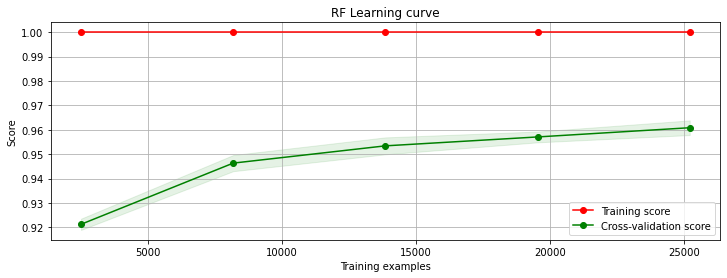

In [69]:
plot_learning_curve(rf_clf, "RF Learning curve", x_training, y_training, n_jobs=-1)

In [70]:
rf_clf.fit(x_training, y_training)

RandomForestClassifier(n_jobs=-1, random_state=32)

In [72]:
y_rf_pred = rf_clf.predict(x_validation)

In [73]:
accuracy_score(y_validation, y_rf_pred)

0.967047619047619

# Drop Padding

In [74]:
x_training_dropzeros = training_df.drop(zero_cols, axis=1).values

x_validation_dropzeros = validation_df.drop(zero_cols, axis=1).values

In [76]:
tune_df = training_df.iloc[tune_idx]

x_tune_dropzeros = tune_df.drop(zero_cols, axis=1).values

In [77]:
random_search(rf_clf, rf_param, 20, x_tune_dropzeros, y_tune)

RandomizedSearchCV took 1040.53 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.972 (std: 0.008)
Parameters: {'max_depth': 15, 'max_features': 35, 'n_estimators': 385}

Model with rank: 2
Mean validation score: 0.972 (std: 0.006)
Parameters: {'max_depth': 19, 'max_features': 32, 'n_estimators': 300}

Model with rank: 3
Mean validation score: 0.969 (std: 0.009)
Parameters: {'max_depth': 18, 'max_features': 29, 'n_estimators': 337}



In [78]:
rf_clf_dropzeros = RandomForestClassifier(n_estimators = 347, max_depth = 16, max_features = 25, random_state = 32)

In [79]:
rf_clf_dropzeros.fit(x_training_dropzeros, y_training)
y_rf_dropzeros_pred = rf_clf_dropzeros.predict(x_validation_dropzeros)
accuracy_score(y_validation, y_rf_dropzeros_pred)

0.9844761904761905

# Flatten Greyscale

In [80]:
x_training_flat = x_training_dropzeros.astype(bool)*1

x_validation_flat = x_validation_dropzeros.astype(bool)*1

x_tune_flat = x_tune_dropzeros.astype(bool)*1

In [81]:
random_search(rf_clf, rf_param, 20, x_tune_flat, y_tune)

RandomizedSearchCV took 736.75 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.944 (std: 0.011)
Parameters: {'max_depth': 18, 'max_features': 23, 'n_estimators': 324}

Model with rank: 2
Mean validation score: 0.942 (std: 0.011)
Parameters: {'max_depth': 15, 'max_features': 17, 'n_estimators': 374}

Model with rank: 3
Mean validation score: 0.942 (std: 0.011)
Parameters: {'max_depth': 15, 'max_features': 22, 'n_estimators': 228}



In [82]:
rf_clf_flat = RandomForestClassifier(n_estimators = 332, max_depth = 14, max_features = 35, random_state = 32)

In [83]:
rf_clf_flat.fit(x_training_flat, y_training)
y_rf_flat_pred = rf_clf_flat.predict(x_validation_flat)
accuracy_score(y_validation, y_rf_flat_pred)

0.9655238095238096

# Examining the model's mistakes

In [84]:
error_idx = np.where(y_validation != y_rf_dropzeros_pred)[0]
error_idx

array([   29,    44,   146,   221,   224,   281,   321,   332,   346,
         438,   479,   537,   557,   835,   967,   988,  1015,  1040,
        1048,  1083,  1094,  1111,  1151,  1220,  1291,  1403,  1455,
        1462,  1533,  1535,  1559,  1567,  1608,  1651,  1653,  1749,
        1884,  1921,  2015,  2052,  2069,  2082,  2229,  2292,  2343,
        2399,  2403,  2415,  2465,  2511,  2564,  2600,  2715,  2749,
        2750,  2774,  2783,  2826,  3047,  3069,  3081,  3305,  3341,
        3413,  3469,  3615,  4060,  4084,  4139,  4244,  4283,  4300,
        4337,  4364,  4404,  4444,  4503,  4574,  4722,  4757,  4840,
        4849,  4920,  4960,  5099,  5153,  5165,  5390,  5460,  5493,
        5600,  5608,  5609,  5628,  5698,  5752,  5787,  5889,  5964,
        5965,  5972,  6107,  6248,  6418,  6476,  6491,  6575,  6685,
        6711,  6720,  6728,  6813,  6872,  7079,  7127,  7140,  7618,
        7673,  7937,  8020,  8039,  8199,  8221,  8397,  8417,  8429,
        8515,  8576,

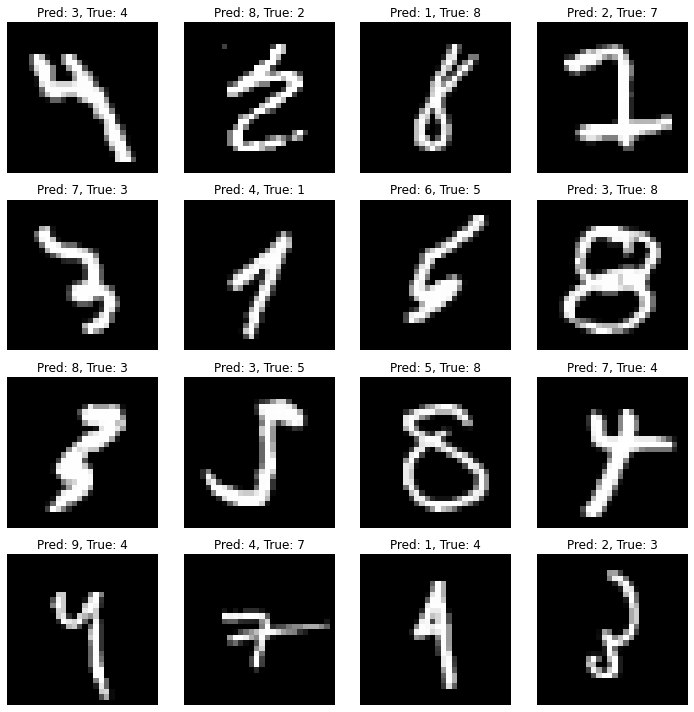

In [85]:
rand_idx = np.random.choice(error_idx, size=16, replace=False)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Pred: %d, True: %d" % (y_rf_dropzeros_pred[rand_idx[i]], y_validation[rand_idx[i]]))
    ax.imshow(x_validation[rand_idx[i]].reshape(28,28), cmap=plt.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
plt.tight_layout()    
plt.show()